# Visualize Terrascope Sentinel-2 products


The Belgian Collaborative ground segment **TERRASCOPE** systematically processes Sentinel-2 L1C products into Surface Reflectance (TOC) and several biophysical parameters (NDVI, FAPAR, FCOVER, LAI) over Belgium. 

This notebook illustrates i) how to find the paths of different Sentinel-2 products (TOC, NDVI, FAPAR, FCOVER, LAI) for a cloudfree day over Belgium, ii) mosaic them using virtual raster files (vrt) and iii) visualize these. We use the 'reticulate' R library to access a Python library that supports finding locations of Sentinel-2 products on the MEP. Reusing this Python library ensures that R users can also benefit from everything that is implemented for Python users. 

More information on Terrascope and the Sentinel-2 products can be found at [www.terrascope.be](https://www.terrascope.be/)

If you run this script in the jupyterlab of terrascope, make sure to shutdown all kernels before reconnecting as the last cell uses a lot of memory.


## 1. Load libraries


In [337]:
library(raster)
library(gdalUtils)
library(reticulate)

In [2]:
catalogclient <- import("terracatalogueclient")
datetime <- import("datetime")

In [17]:
cat = catalogclient$Catalogue

collections_list <- cat()$get_collections()
collections <- iterate(collections_list)
print(paste0("number of collections are: ", length(collections)))

print("and they are are: ")
for(i in collections)
  {print(i)}

[1] "number of collections are: 111"
[1] "and they are are: "
urn:eop:VITO:CGS_S1_GRD_L1
urn:eop:VITO:CGS_S1_GRD_SIGMA0_L1
urn:eop:VITO:CGS_S1_SLC_L1
urn:eop:VITO:CGS_S2_L1C
urn:eop:VITO:COP_DEM_EU_25M
urn:eop:VITO:COP_DEM_GLO_30M_COG
urn:eop:VITO:COP_DEM_GLO_90M_COG
urn:eop:VITO:ESA_WORLDCEREAL_ACTIVECROPLAND_V1
urn:eop:VITO:ESA_WORLDCEREAL_IRRIGATION_V1
urn:eop:VITO:ESA_WORLDCEREAL_MAIZE_V1
urn:eop:VITO:ESA_WORLDCEREAL_SPRINGCEREALS_V1
urn:eop:VITO:ESA_WORLDCEREAL_TEMPORARYCROPS_V1
urn:eop:VITO:ESA_WORLDCEREAL_WINTERCEREALS_V1
urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1
urn:eop:VITO:ESA_WorldCover_10m_2020_V1
urn:eop:VITO:ESA_WorldCover_10m_2021_AWS_V2
urn:eop:VITO:ESA_WorldCover_10m_2021_V2
urn:eop:VITO:ESA_WorldCover_NDVI_10m_2020_V1
urn:eop:VITO:ESA_WorldCover_NDVI_10m_2021_V2
urn:eop:VITO:ESA_WorldCover_S1VVVHratio_10m_2020_V1
urn:eop:VITO:ESA_WorldCover_S1VVVHratio_10m_2021_V2
urn:eop:VITO:ESA_WorldCover_S2RGBNIR_10m_2020_V1
urn:eop:VITO:ESA_WorldCover_S2RGBNIR_10m_2021_V2
urn:e

In [16]:
# check all collections related to Sentinel-1
collections_sentinel2 <- cat()$get_collections(platform="Sentinel-2")

collections <- iterate(collections_sentinel2)
print(paste0("number of products are: ", length(collections)))

print("and they are are: ")
for(i in collections)
  {print(i)}

[1] "number of products are: 28"
[1] "and they are are: "
urn:eop:VITO:CGS_S2_L1C
urn:eop:VITO:ESA_WORLDCEREAL_ACTIVECROPLAND_V1
urn:eop:VITO:ESA_WORLDCEREAL_IRRIGATION_V1
urn:eop:VITO:ESA_WORLDCEREAL_MAIZE_V1
urn:eop:VITO:ESA_WORLDCEREAL_SPRINGCEREALS_V1
urn:eop:VITO:ESA_WORLDCEREAL_TEMPORARYCROPS_V1
urn:eop:VITO:ESA_WORLDCEREAL_WINTERCEREALS_V1
urn:eop:VITO:ESA_WorldCover_10m_2020_AWS_V1
urn:eop:VITO:ESA_WorldCover_10m_2020_V1
urn:eop:VITO:ESA_WorldCover_10m_2021_AWS_V2
urn:eop:VITO:ESA_WorldCover_10m_2021_V2
urn:eop:VITO:ESA_WorldCover_NDVI_10m_2020_V1
urn:eop:VITO:ESA_WorldCover_NDVI_10m_2021_V2
urn:eop:VITO:ESA_WorldCover_S2RGBNIR_10m_2020_V1
urn:eop:VITO:ESA_WorldCover_S2RGBNIR_10m_2021_V2
urn:eop:VITO:ESA_WorldCover_SWIR_10m_2020_V1
urn:eop:VITO:ESA_WorldCover_SWIR_10m_2021_V2
urn:eop:VITO:TERRASCOPE_S2_CCC_V2
urn:eop:VITO:TERRASCOPE_S2_CHL_V1
urn:eop:VITO:TERRASCOPE_S2_CWC_V2
urn:eop:VITO:TERRASCOPE_S2_FAPAR_V2
urn:eop:VITO:TERRASCOPE_S2_FCOVER_V2
urn:eop:VITO:TERRASCOPE_S2_LAI

let's show all collections of the platform(Sentinel-2)

## 2. Get product paths

In [408]:
# choose any product type in the lists we made earlier
startDate  = "2017-05-29"
endDate = "2017-05-30"
minLatitude  = 51 #in decimal degrees, positive for North
maxLatitude  = 52
minLongitude = 4 #in decimal degrees, positive for East
maxLongitude = 5

#TOC
products_TOC = cat()$get_products('urn:eop:VITO:TERRASCOPE_S2_TOC_V2',startDate, endDate,
                                  bbox=c(minLongitude, minLatitude, maxLongitude, maxLatitude),
                                  accessedFrom="MEP")

#NDVI
products_NDVI= cat()$get_products('urn:eop:VITO:TERRASCOPE_S2_NDVI_V2',startDate, endDate,
                                  bbox=c(minLongitude, minLatitude, maxLongitude, maxLatitude),
                                  accessedFrom="MEP")
#FAPAR
products_FAPAR= cat()$get_products('urn:eop:VITO:TERRASCOPE_S2_FAPAR_V2',startDate, endDate,
                                  bbox=c(minLongitude, minLatitude, maxLongitude, maxLatitude),
                                  accessedFrom="MEP")
#FCOVER
products_FCOVER= cat()$get_products('urn:eop:VITO:TERRASCOPE_S2_FCOVER_V2',startDate, endDate,
                                  bbox=c(minLongitude, minLatitude, maxLongitude, maxLatitude),
                                  accessedFrom="MEP")
#LAI
products_LAI= cat()$get_products('urn:eop:VITO:TERRASCOPE_S2_LAI_V2',startDate, endDate,
                                  bbox=c(minLongitude, minLatitude, maxLongitude, maxLatitude),
                                  accessedFrom="MEP")

In [409]:
products_list_TOC <- iterate(products_TOC)
products_list_NDVI <- iterate(products_NDVI)
products_list_FAPAR <- iterate(products_FAPAR)
products_list_FCOVER <- iterate(products_FCOVER)
products_list_LAI <- iterate(products_LAI)

Next, we use `lapply` to retrieve the paths to the different files which we will use for subsequent visualization.

In [414]:
get_paths <- function(products,pattern){
    pr_list = lapply(products,function(p) p$data)    
    tmp <- (sapply(pr_list,FUN=function(x)(lapply(x,FUN=function(y)(as.character(y))))))     
    return(gsub("file://","",tmp[grep(pattern,tmp)]))
                                                  
}
          

In [415]:
#TOC
files_B2 <- get_paths(products_list_TOC,"B02")
files_B3 <- get_paths(products_list_TOC,"B03")
files_B4 <- get_paths(products_list_TOC,"B04")
files_B8 <- get_paths(products_list_TOC,"B08")
head(files_B2)

#NDVI
files_NDVI <- get_paths(products_list_NDVI,"NDVI_10M")
head(files_NDVI)

#FAPAR
files_FAPAR <- get_paths(products_list_FAPAR,"FAPAR_10M")
head(files_FAPAR)

#FCOVER
files_FCOVER <- get_paths(products_list_FCOVER,"FCOVER_10M")
head(files_FCOVER)

#LAI
files_LAI <- get_paths(products_list_LAI,"LAI_10M")
head(files_LAI)

[1] "/data/MTDA/TERRASCOPE_Sentinel2/TOC_V2/2017/05/29/S2A_20170529T105621_31UET_TOC_V200/S2A_20170529T105621_31UET_TOC-B02_10M_V200.tif"

[1] "/data/MTDA/TERRASCOPE_Sentinel2/NDVI_V2/2017/05/29/S2A_20170529T105621_31UET_NDVI_V200/S2A_20170529T105621_31UET_NDVI_10M_V200.tif"

[1] "/data/MTDA/TERRASCOPE_Sentinel2/FAPAR_V2/2017/05/29/S2A_20170529T105621_31UET_FAPAR_V200/10M/S2A_20170529T105621_31UET_FAPAR_10M_V200.tif"

[1] "/data/MTDA/TERRASCOPE_Sentinel2/FCOVER_V2/2017/05/29/S2A_20170529T105621_31UET_FCOVER_V200/10M/S2A_20170529T105621_31UET_FCOVER_10M_V200.tif"

[1] "/data/MTDA/TERRASCOPE_Sentinel2/LAI_V2/2017/05/29/S2A_20170529T105621_31UET_LAI_V200/10M/S2A_20170529T105621_31UET_LAI_10M_V200.tif"

## 3. Make spatial vrt per band (combining all tiles)

Next, we use the gdalbuildvrt function from the gdalUtils library to build spatial vrt's, i.e. a virtual raster file which is a spatial mosaic of all Sentinel-2 tiles for that particular day. 

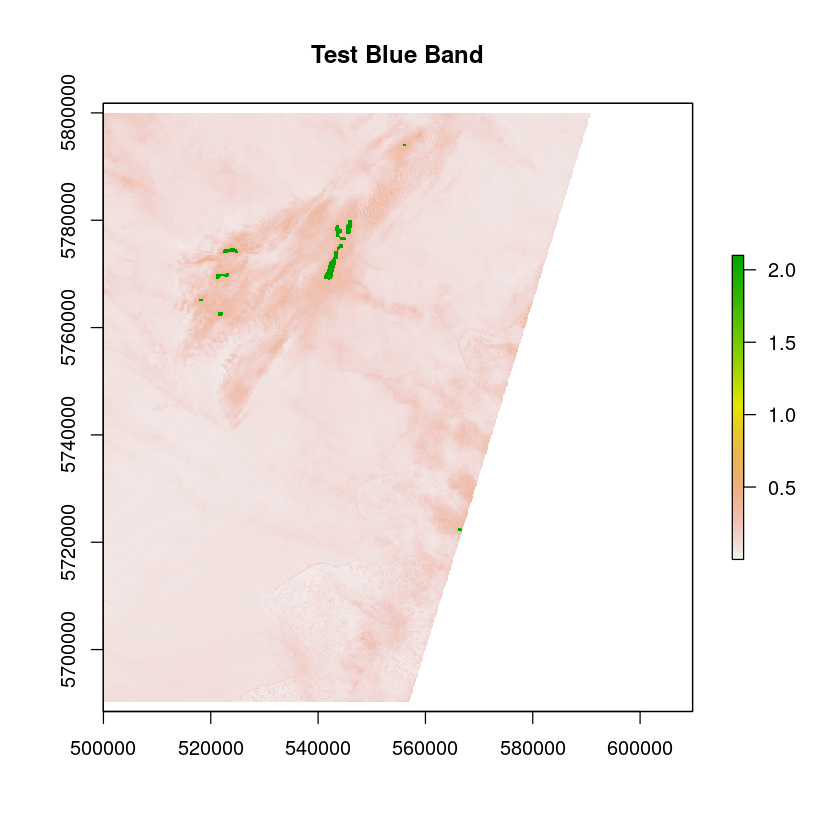

In [419]:
# check if files are ok
r <- raster(files_B2)#
plot(r, main='Test Blue Band')

In [416]:
#TOC
gdalbuildvrt(files_B2,"B2.vrt")
gdalbuildvrt(files_B3,"B3.vrt")
gdalbuildvrt(files_B4,"B4.vrt")
gdalbuildvrt(files_B8,"B8.vrt")

#NDVI
gdalbuildvrt(files_NDVI,"NDVI.vrt")

#FAPAR
gdalbuildvrt(files_FAPAR,"FAPAR.vrt")

#FCOVER
gdalbuildvrt(files_FCOVER,"FCOVER.vrt")

#LAI
gdalbuildvrt(files_LAI,"LAI.vrt")


NULL

NULL

NULL

NULL

NULL

NULL

NULL

NULL

## 4. Make multiband vrt

The gdalbuildvrt function is again called to stack the individual Sentinel-2 bands (B2, B3, B4 and B8) into a multiband vrt.

In [420]:
gdalbuildvrt(c("B2.vrt","B3.vrt","B4.vrt","B8.vrt"),"RGBNIR.vrt",separate=T)

NULL

## 5. Plot

Next we use the plotting functions from the R raster package to visualize i) RGB composites and ii) the individual biophysical parameters. Note that these products are scaled between 0-255 (Biopars). More information on the used gains and offset can be found at [www.terrascope.be](https://www.terrascope.be/)

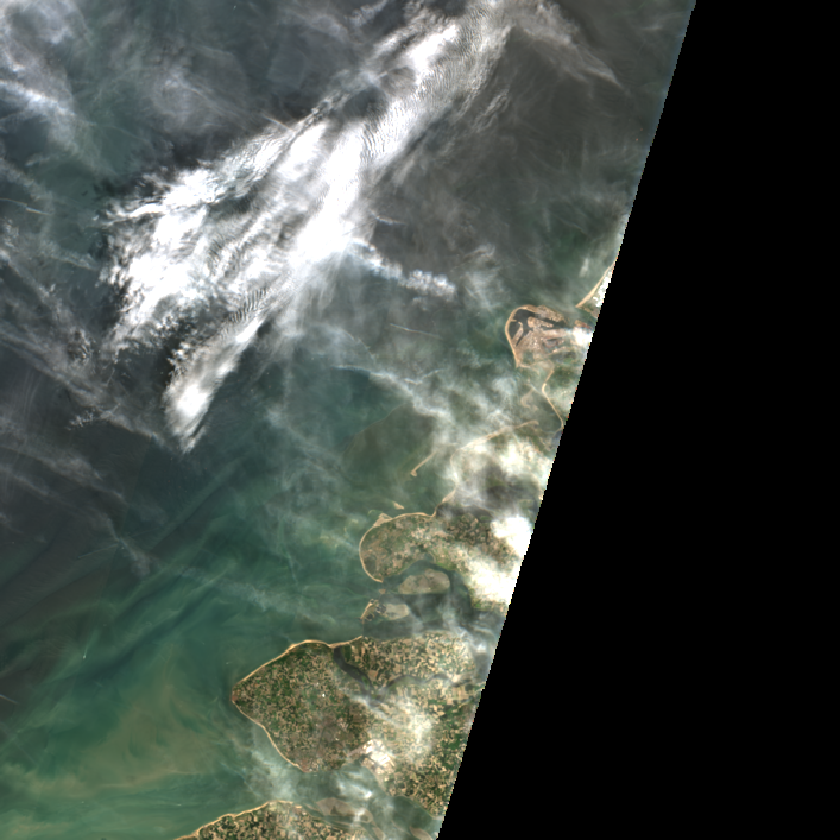

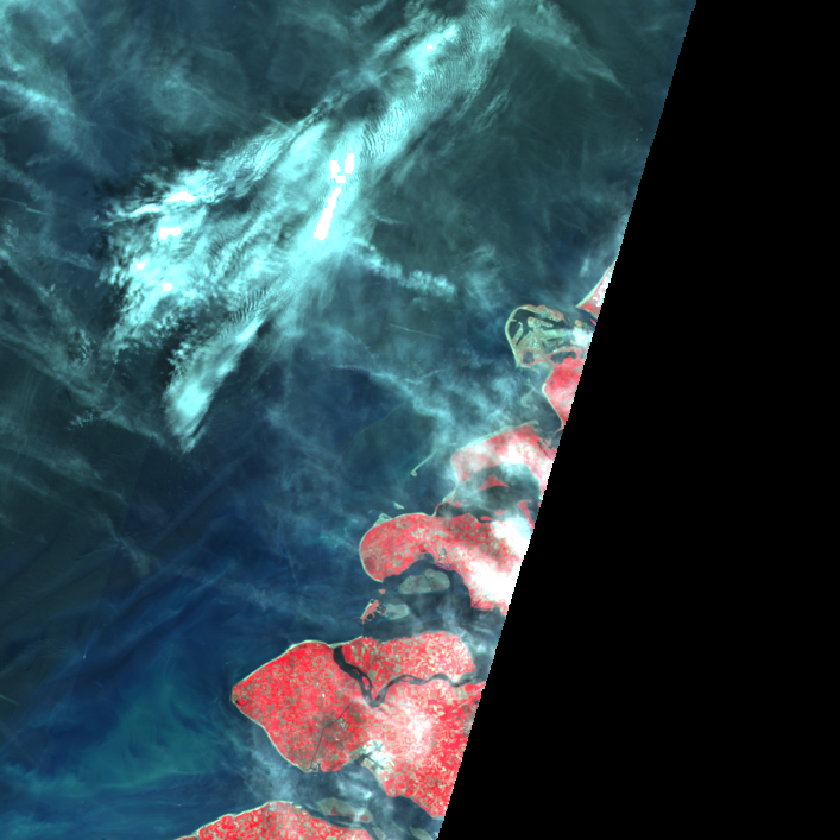

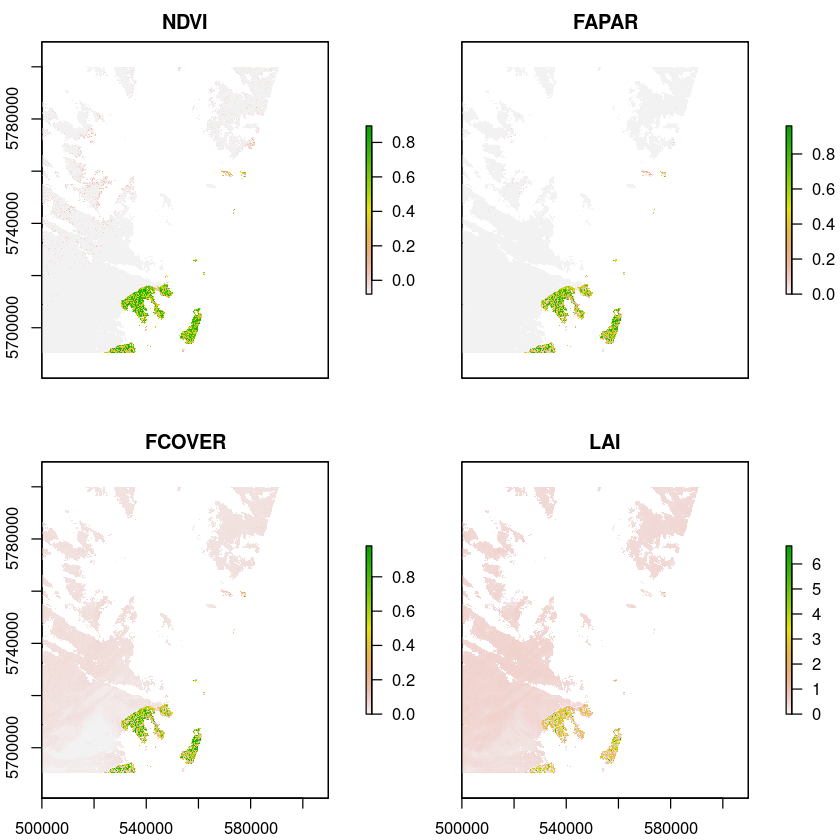

In [421]:
#TOC
im_RGBNIR <- stack("RGBNIR.vrt")
names(im_RGBNIR)<- c("B","G","R","NIR")

#RGB composites
plotRGB(im_RGBNIR,3,2,1,scale=10000,stretch="lin") #True Colour Composite with R=B4, G=B3, B=B2

plotRGB(im_RGBNIR,4,3,2,scale=10000,stretch="lin") #False Colour Composite with R=B8, G=B4, B=B3

#Biopar
im_Biopar <- stack(c(raster("NDVI.vrt"),raster("FAPAR.vrt"),raster("FCOVER.vrt"),raster("LAI.vrt")))
names(im_Biopar) <- c("NDVI","FAPAR","FCOVER","LAI")
plot(im_Biopar)               
